# Исследовательский анализ

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import yaml

import seaborn as sns
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision",6)
pd.set_option("plotting.backend", "matplotlib")

#Для корректного отображения графиков в ноутбуках используется команда %matplotlib inline
%matplotlib inline
# для корректного отображения графиков на тёмном фоне
plt.style.use('default')

# Загрузка и анализ сырых данных

In [2]:
project_path = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir, os.path.pardir))
f_input = os.path.join("data", "raw", "SF_Mandarin_dataset_ver3_csv.csv")
filename = os.path.join(project_path,f_input)

In [3]:
df = pd.read_csv(filename, sep=';')

Размер набора данных

In [4]:
print(f'Строк - {df.shape[0]}\nСтолбцов - {df.shape[1]}')

Строк - 8787
Столбцов - 22


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SkillFactory_Id    6603 non-null   float64
 1   BirthDate          6603 non-null   object 
 2   education          6603 non-null   object 
 3   employment status  6603 non-null   object 
 4   Value              6523 non-null   object 
 5   JobStartDate       6494 non-null   object 
 6   Position           6494 non-null   object 
 7   MonthProfit        6603 non-null   float64
 8   MonthExpense       6603 non-null   float64
 9   Gender             6566 non-null   float64
 10  Family status      6566 non-null   object 
 11  ChildCount         6566 non-null   float64
 12  SNILS              6603 non-null   float64
 13  BankA_decision     6603 non-null   object 
 14  BankB_decision     6603 non-null   object 
 15  BankC_decision     6603 non-null   object 
 16  BankD_decision     6603 

In [6]:
df.describe()

,SkillFactory_Id,MonthProfit,MonthExpense,Gender,ChildCount,SNILS,Merch_code,Loan_amount,Loan_term
count,6603.000000,6.603000e+03,6603.000000,6566.000000,6566.000000,6603.000000,6603.000000,6603.000000,6603.000000
mean,4388.192640,1.484528e+05,26234.063153,0.309625,0.097320,0.350295,38.794184,76362.108133,12.117219
std,2515.520596,7.742496e+04,22557.993167,0.462374,0.423026,0.477099,23.929860,50978.500496,5.996582
min,1.000000,5.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,4000.000000,6.000000
25%,2225.500000,1.000000e+05,15000.000000,0.000000,0.000000,0.000000,18.000000,35000.000000,6.000000
50%,4431.000000,1.450000e+05,22500.000000,0.000000,0.000000,0.000000,36.000000,68000.000000,12.000000
75%,6516.500000,1.900000e+05,31000.000000,1.000000,0.000000,1.000000,63.000000,101000.000000,18.000000
max,8787.000000,1.200000e+06,500000.000000,1.000000,5.000000,1.000000,80.000000,200000.000000,24.000000


In [7]:
# Количество дубликатов:
df.duplicated().sum()

2183

In [8]:
# Строк с пустыми значениями
df[df.isnull().any(axis=1)].shape[0]

2323

In [9]:
df.isna().sum()

SkillFactory_Id      2184
BirthDate            2184
education            2184
employment status    2184
Value                2264
                     ... 
BankE_decision       2184
Merch_code           2184
Loan_amount          2184
Loan_term            2184
Goods_category       2184
Length: 22, dtype: int64

# Загрузка и анализ данных после предобработки

## Данные после 1-го этапа заполнения пропусков

In [4]:
# f_input = os.path.join("data", "raw", "SF_Mandarin_dataset_ver3_csv.csv")
f_input1="data/stage_fill_na/dataset.csv"
filename = os.path.join(project_path,f_input1)
df1 = pd.read_csv(filename, sep=';')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SkillFactory_Id    6603 non-null   float64
 1   BirthDate          6603 non-null   object 
 2   education          6603 non-null   object 
 3   employment status  6603 non-null   object 
 4   Value              6603 non-null   object 
 5   JobStartDate       6494 non-null   object 
 6   Position           6494 non-null   object 
 7   MonthProfit        6603 non-null   float64
 8   MonthExpense       6603 non-null   float64
 9   Gender             6603 non-null   float64
 10  Family status      6603 non-null   object 
 11  ChildCount         6603 non-null   float64
 12  SNILS              6603 non-null   float64
 13  BankA_decision     6603 non-null   object 
 14  BankB_decision     6603 non-null   object 
 15  BankC_decision     6603 non-null   object 
 16  BankD_decision     6603 

## Данные после 2-го этапа корректировки типов данных

In [11]:
f_input2="data/stage_data_prepare/dataset.csv"
filename = os.path.join(project_path,f_input2)
df2 = pd.read_csv(filename, sep=';', parse_dates=['JobStartDate', 'BirthDate'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SkillFactory_Id    6603 non-null   float64       
 1   BirthDate          6603 non-null   datetime64[ns]
 2   education          6603 non-null   object        
 3   employment status  6603 non-null   object        
 4   Value              6603 non-null   object        
 5   JobStartDate       6494 non-null   datetime64[ns]
 6   Position           6494 non-null   object        
 7   MonthProfit        6603 non-null   float64       
 8   MonthExpense       6603 non-null   float64       
 9   Gender             6603 non-null   int64         
 10  Family status      6603 non-null   object        
 11  ChildCount         6603 non-null   int64         
 12  SNILS              6603 non-null   int64         
 13  BankA_decision     6603 non-null   object        
 14  BankB_de

In [12]:
# Количество дубликатов:
df2.duplicated().sum()

0

In [13]:
# Строк с пустыми значениями
df2[df2.isnull().any(axis=1)].shape[0]

109

In [6]:
f_input3="data/stage_fix_errors/dataset.csv"
filename = os.path.join(project_path,f_input3)
df3 = pd.read_csv(filename, sep=';', parse_dates=['JobStartDate', 'BirthDate'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SkillFactory_Id    6603 non-null   float64       
 1   BirthDate          6603 non-null   datetime64[ns]
 2   education          6603 non-null   object        
 3   employment status  6603 non-null   object        
 4   Value              6603 non-null   object        
 5   JobStartDate       6494 non-null   datetime64[ns]
 6   Position           6494 non-null   object        
 7   MonthProfit        6603 non-null   float64       
 8   MonthExpense       6603 non-null   float64       
 9   Gender             6603 non-null   int64         
 10  Family status      6603 non-null   object        
 11  ChildCount         6603 non-null   int64         
 12  SNILS              6603 non-null   int64         
 13  BankA_decision     6603 non-null   object        
 14  BankB_de

In [25]:
f_input4="data/stage_create_features/dataset.csv"
filename = os.path.join(project_path,f_input4)
df4 = pd.read_csv(filename, sep=';')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Columns: 147 entries, образование to стаж работы код
dtypes: float64(4), int64(137), object(6)
memory usage: 7.4+ MB


### Проверка методов предобработки

In [5]:
from importlib import reload
from dateutil.relativedelta import relativedelta
from datetime import datetime

import data_prepare
# import utils.seniority_cats
from scripts.data_scripts.utils import seniority_cats
import fix_errors
import create_features

reload(data_prepare)
reload(seniority_cats)
reload(fix_errors)
reload(create_features)

<module 'create_features' from '/mnt/data/projects/active/urfu/hacaton2/scripts/data_scripts/create_features.py'>

In [46]:
df2['Loan_term'].value_counts()

Loan_term
12.0    2490
6.0     2406
18.0     879
24.0     828
Name: count, dtype: int64

In [56]:
df2['education'].value_counts()

education
Высшее - специалист         5296
Среднее профессиональное     471
Среднее                      233
Неоконченное высшее          233
Бакалавр                     153
Несколько высших             110
Магистр                       73
Неоконченное среднее          30
MBA                            3
Ученая степень                 1
Name: count, dtype: int64

In [57]:
df1['employment status'].value_counts()

employment status
Работаю по найму полный рабочий день/служу    4858
Собственное дело                              1527
Не работаю                                      75
Работаю по найму неполный рабочий день          62
Студент                                         44
Декретный отпуск                                19
Пенсионер                                       18
Name: count, dtype: int64

In [14]:
aa=df['Value'].value_counts()

In [59]:
df1['Family status'].value_counts()

Family status
Никогда в браке не состоял(а)               4474
Женат / замужем                             1490
Разведён / Разведена                         486
Гражданский брак / совместное проживание     104
Вдовец / вдова                                49
Name: count, dtype: int64

In [60]:
df1['Goods_category'].value_counts()

Goods_category
Furniture           976
Mobile_devices      957
Travel              956
Medical_services    940
Education           936
Fitness             928
Other               910
Name: count, dtype: int64

In [61]:
df1['Merch_code'].value_counts()

Merch_code
35.0    110
11.0    110
74.0    108
62.0    108
63.0    106
       ... 
19.0     84
36.0     83
6.0      82
72.0     79
66.0     79
Name: count, Length: 70, dtype: int64

In [62]:
df1['BankA_decision'].value_counts()

BankA_decision
success    4970
denied     1562
error        71
Name: count, dtype: int64

/tmp/ipykernel_1674864/4098037326.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
/tmp/ipykernel_1674864/4098037326.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
/tmp/ipykernel_1674864/4098037326.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
/tmp/ipykernel_1674864/4098037326.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
/tmp/ipykernel_1674864/4098037326.py:5: UserWarning: set_ticklabels() sh

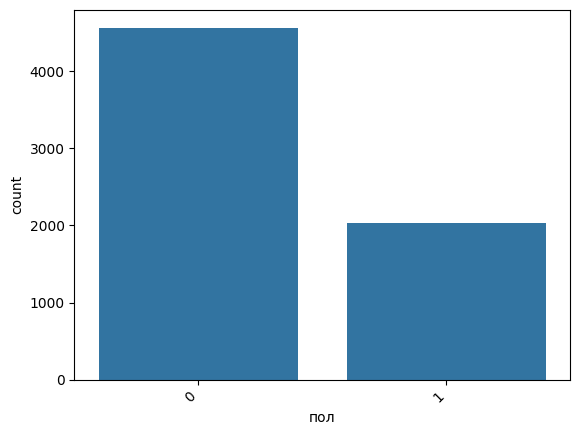

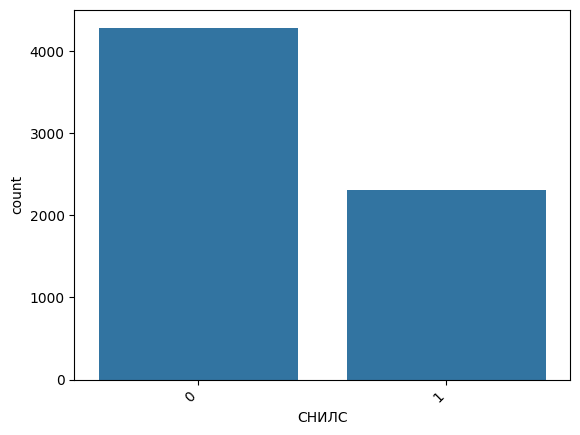

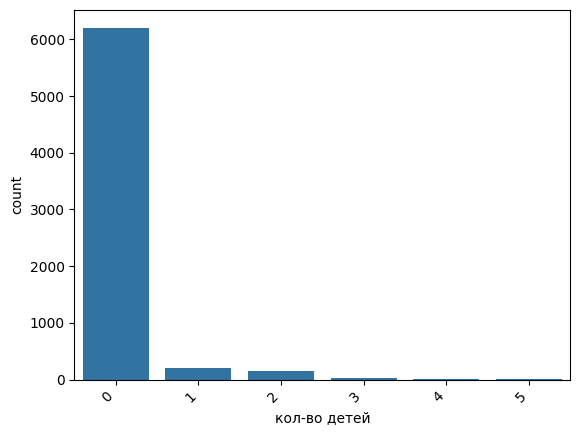

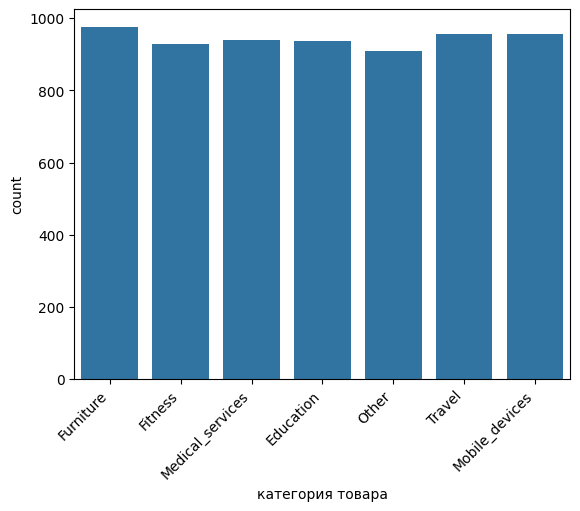

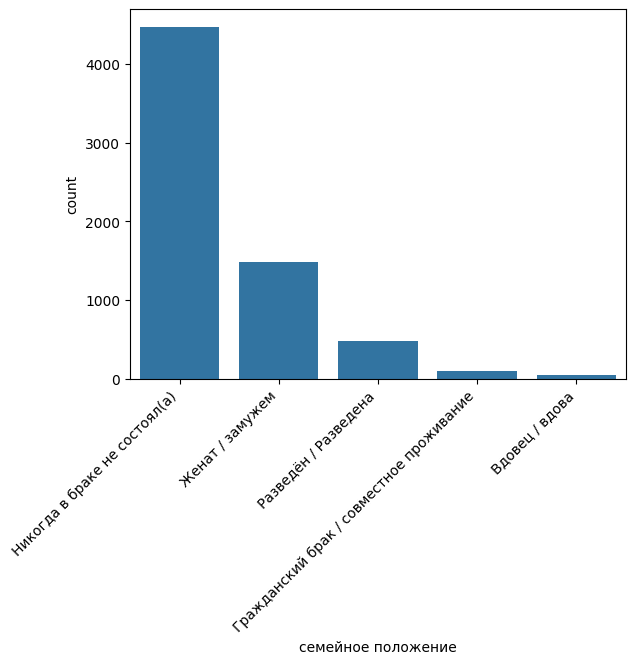

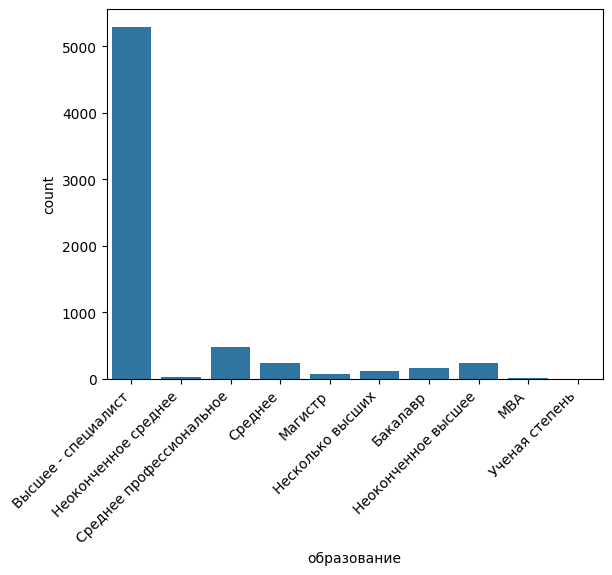

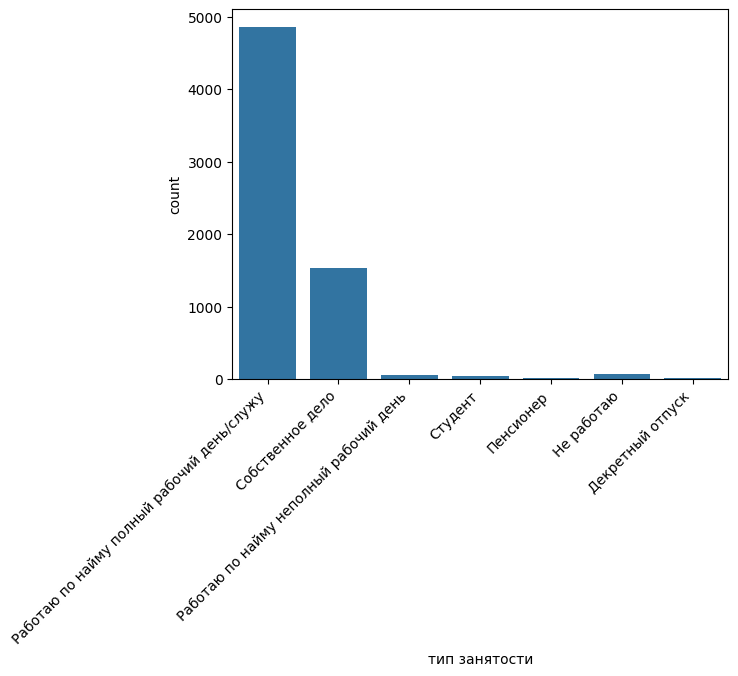

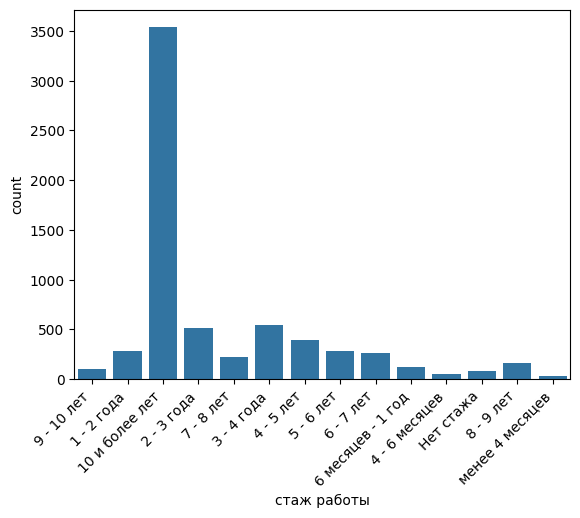

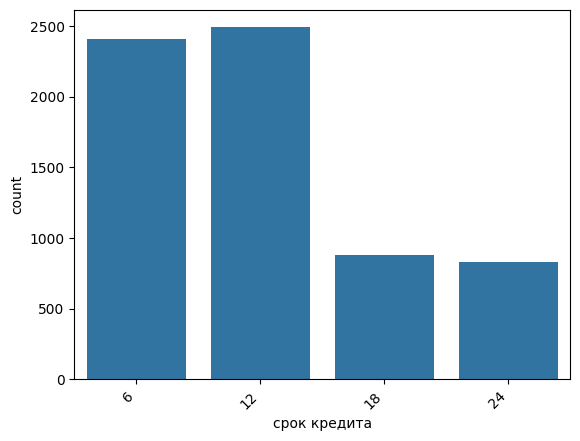

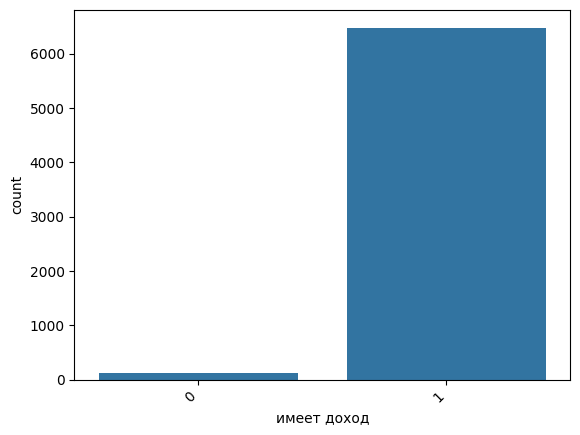

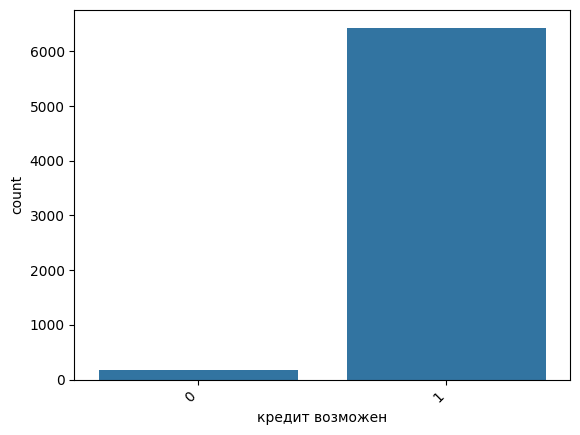

In [17]:
columns=df4[['пол', 'СНИЛС', 'кол-во детей', 'категория товара', 'семейное положение', 'образование', 'тип занятости', 'стаж работы', 'срок кредита', 'имеет доход','кредит возможен']]
for i in columns:
  plt.figure(i)
  myplot=sns.countplot(df4, x=i)
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
                        horizontalalignment='right')

<Axes: xlabel='кредитная нагрузка', ylabel='Count'>

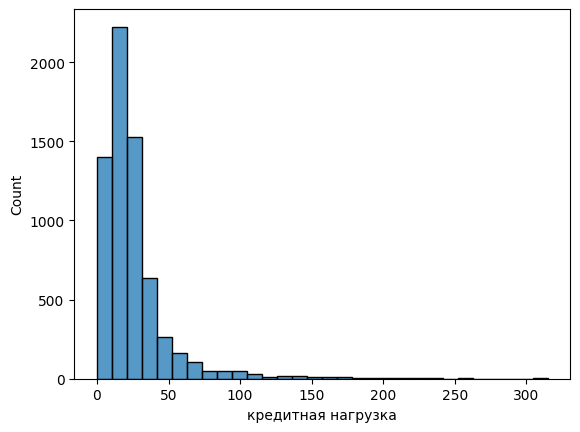

In [20]:
sns.histplot(data=df4, x="кредитная нагрузка", bins=30)

<Axes: xlabel='кредитная нагрузка', ylabel='Count'>

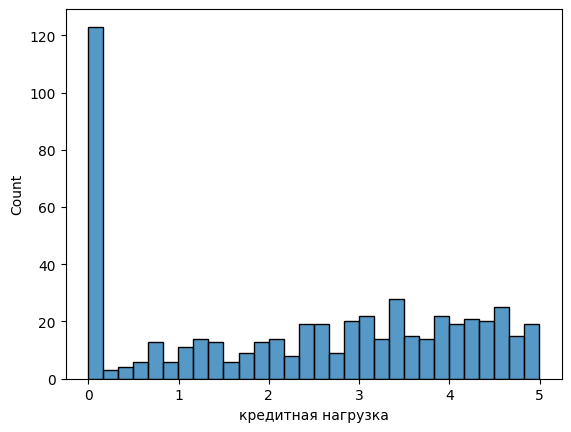

In [22]:
sns.histplot(data=df4[df4["кредитная нагрузка"]<5], x="кредитная нагрузка", bins=30)

In [26]:
df5=df4[['пол', 'СНИЛС', 'кол-во детей', 'категория товара код', 'семейное положение код', 'образование код', 'тип занятости код', 'стаж работы код', 'срок кредита код', 'имеет доход','кредит возможен',  'решение банка A']]

In [27]:

print(df5.corr())

                             пол     СНИЛС  кол-во детей  \
пол                     1.000000  0.014338      0.008755   
СНИЛС                   0.014338  1.000000      0.154383   
кол-во детей            0.008755  0.154383      1.000000   
категория товара код    0.000240  0.019759      0.009084   
семейное положение код  0.000223 -0.073998     -0.117471   
образование код         0.076780  0.261357      0.213321   
тип занятости код      -0.024293 -0.032913     -0.064560   
стаж работы код         0.034427  0.146356      0.104498   
срок кредита код       -0.000892 -0.014354      0.003418   
имеет доход             0.000058 -0.089069     -0.132455   
кредит возможен        -0.004085 -0.071966     -0.328808   
решение банка A         0.016866  0.016875      0.016971   

                        категория товара код  семейное положение код  \
пол                                 0.000240                0.000223   
СНИЛС                               0.019759               -0.073998   
кол

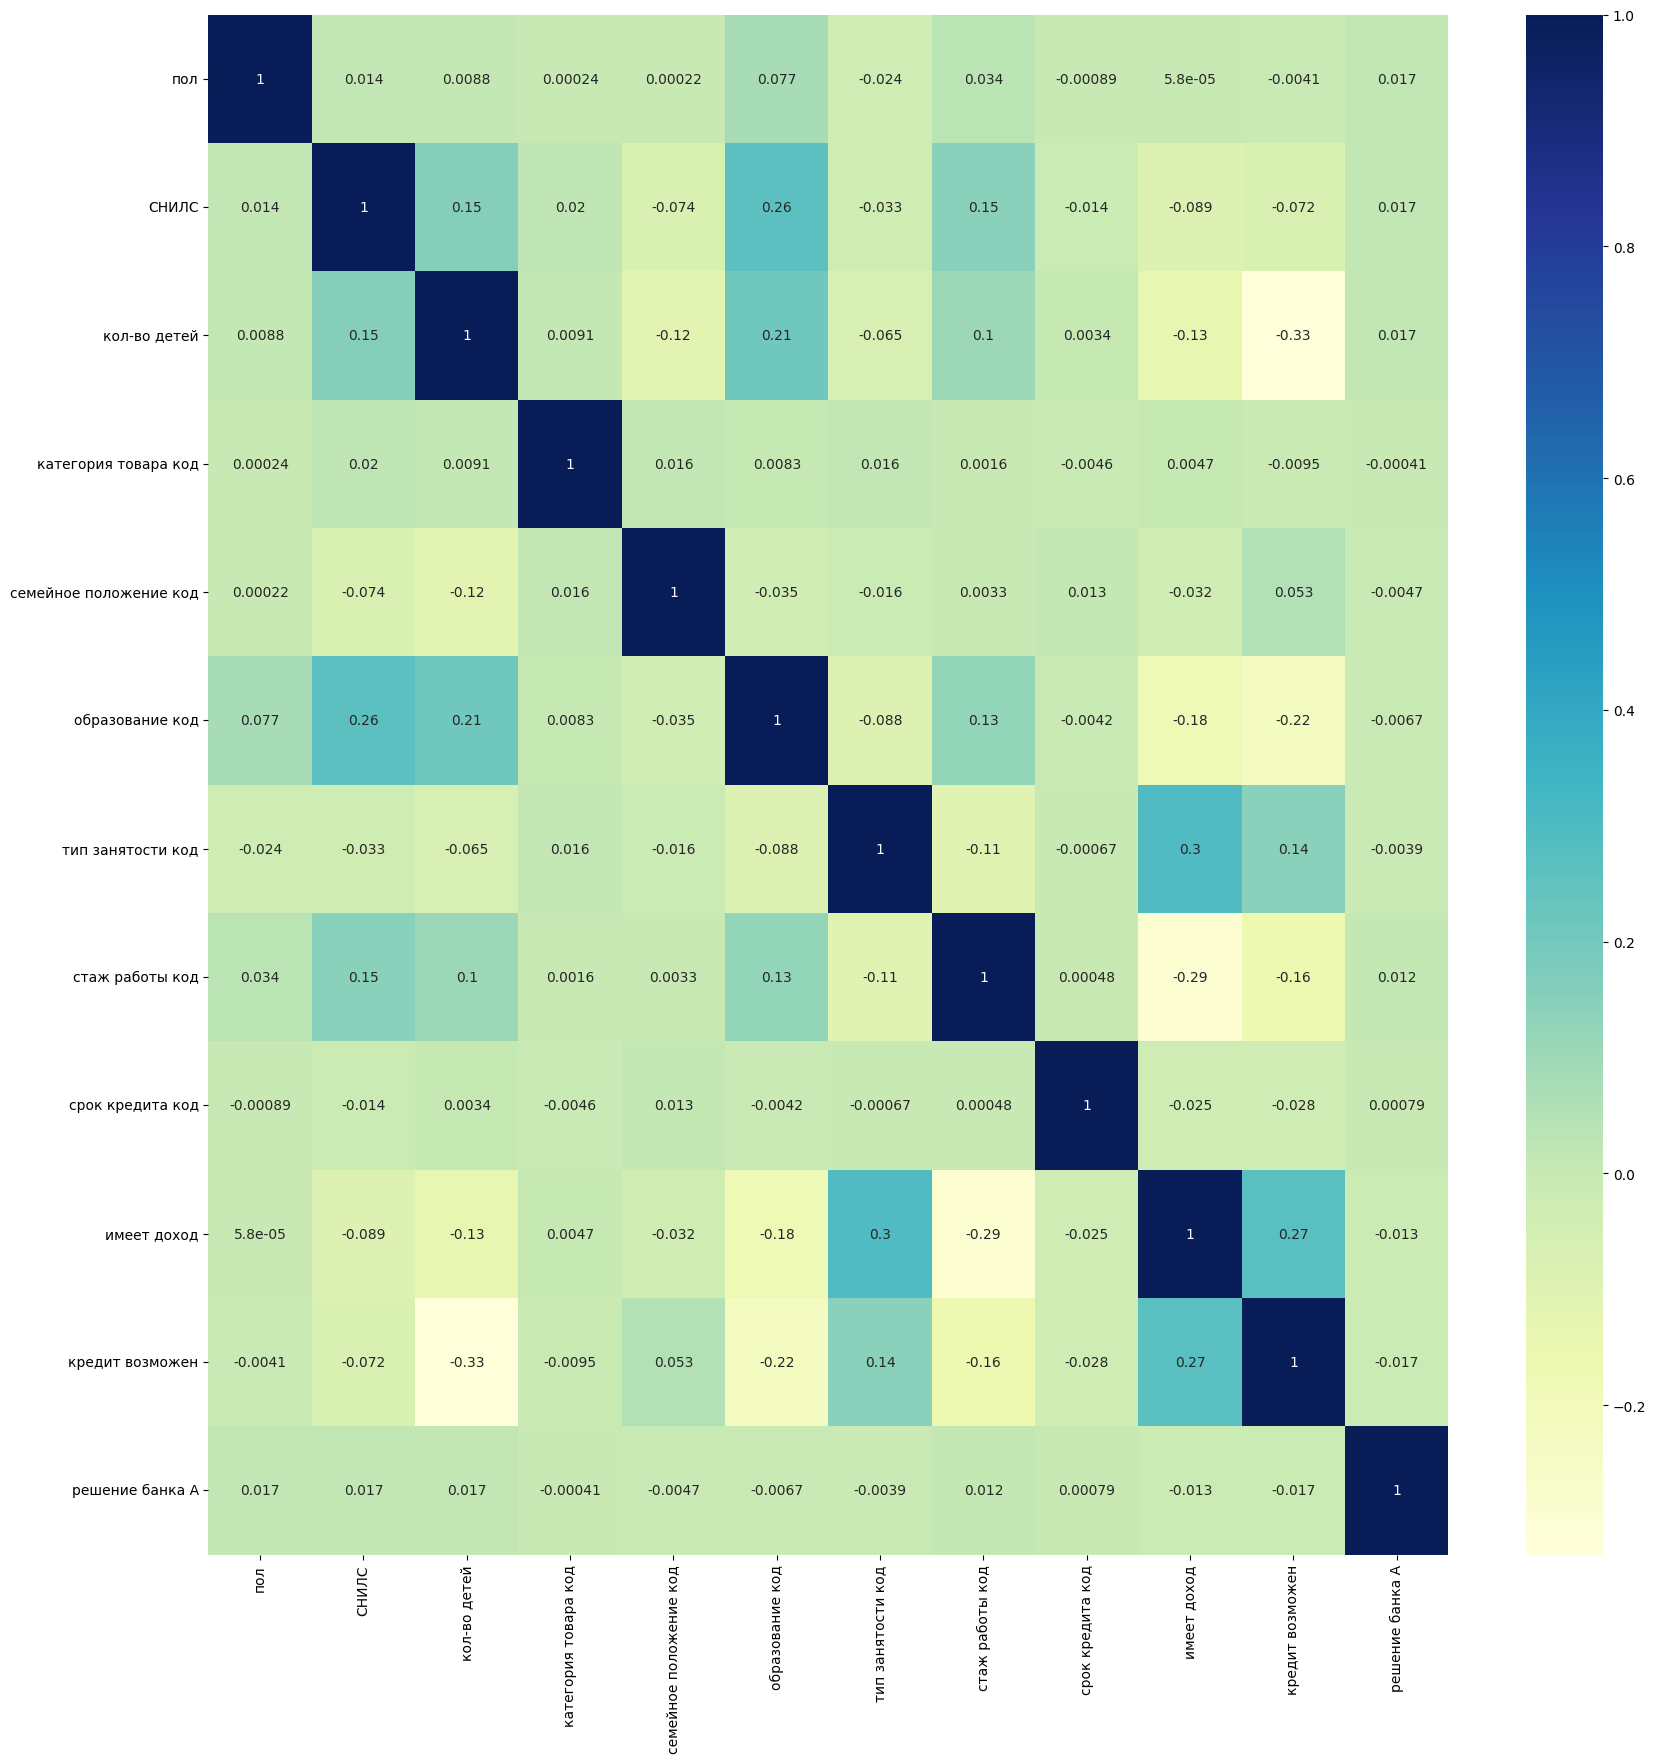

In [32]:

plt.figure(figsize=(20,20))
dataplot = sns.heatmap(df5.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

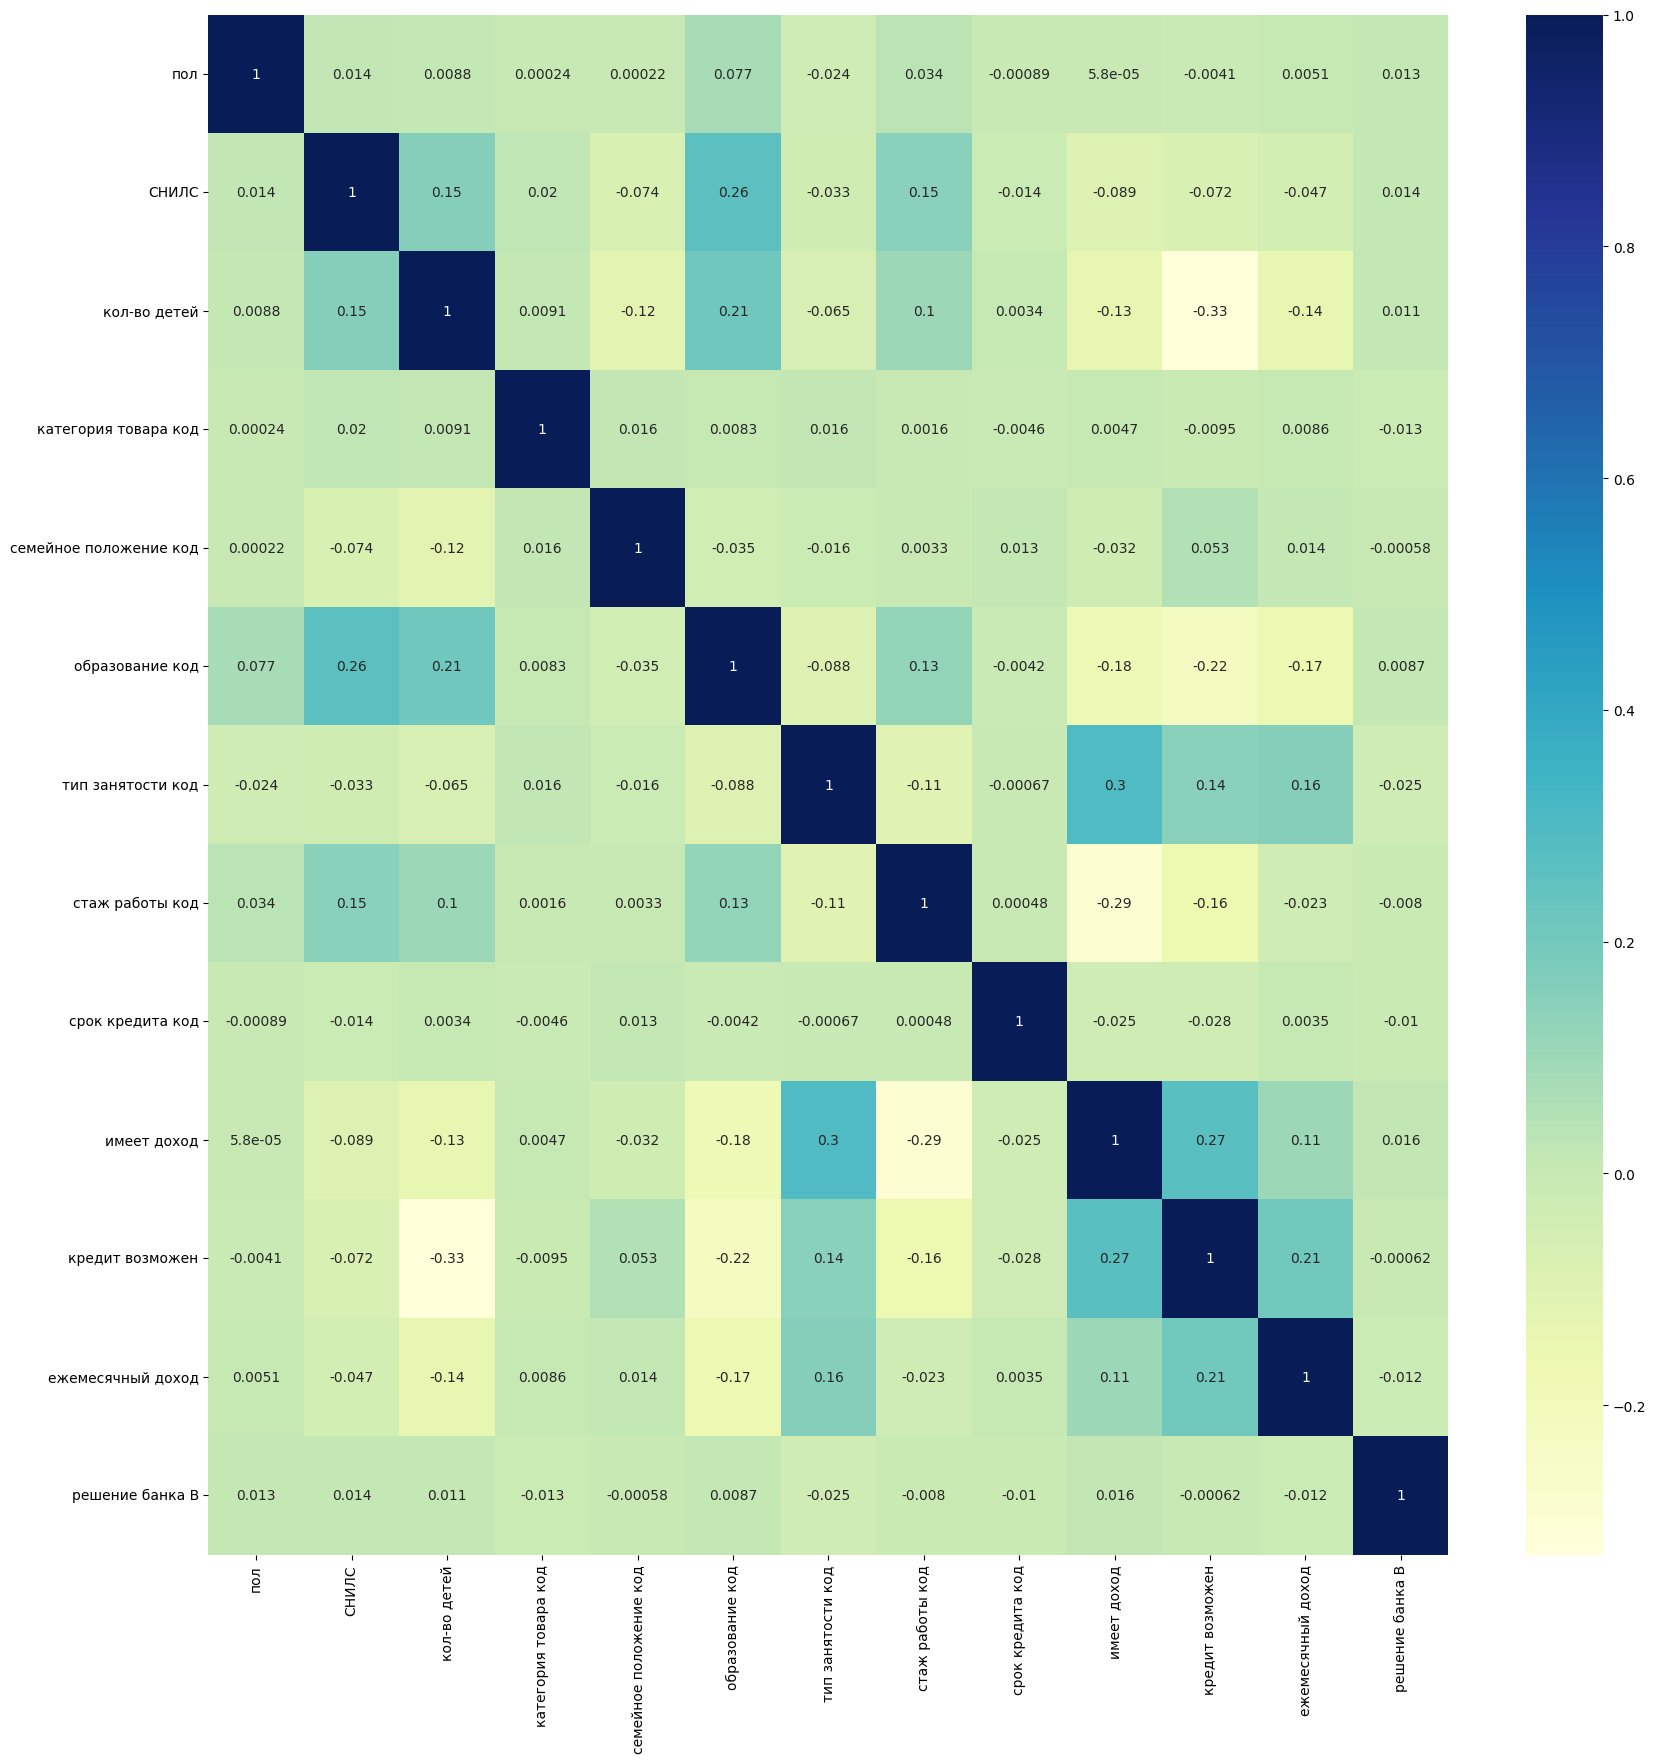

In [34]:
df5_B=df4[['пол', 'СНИЛС', 'кол-во детей', 'категория товара код', 'семейное положение код', 'образование код', 'тип занятости код', 'стаж работы код', 'срок кредита код', 'имеет доход','кредит возможен', 'ежемесячный доход', 'решение банка B']]
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(df5_B.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

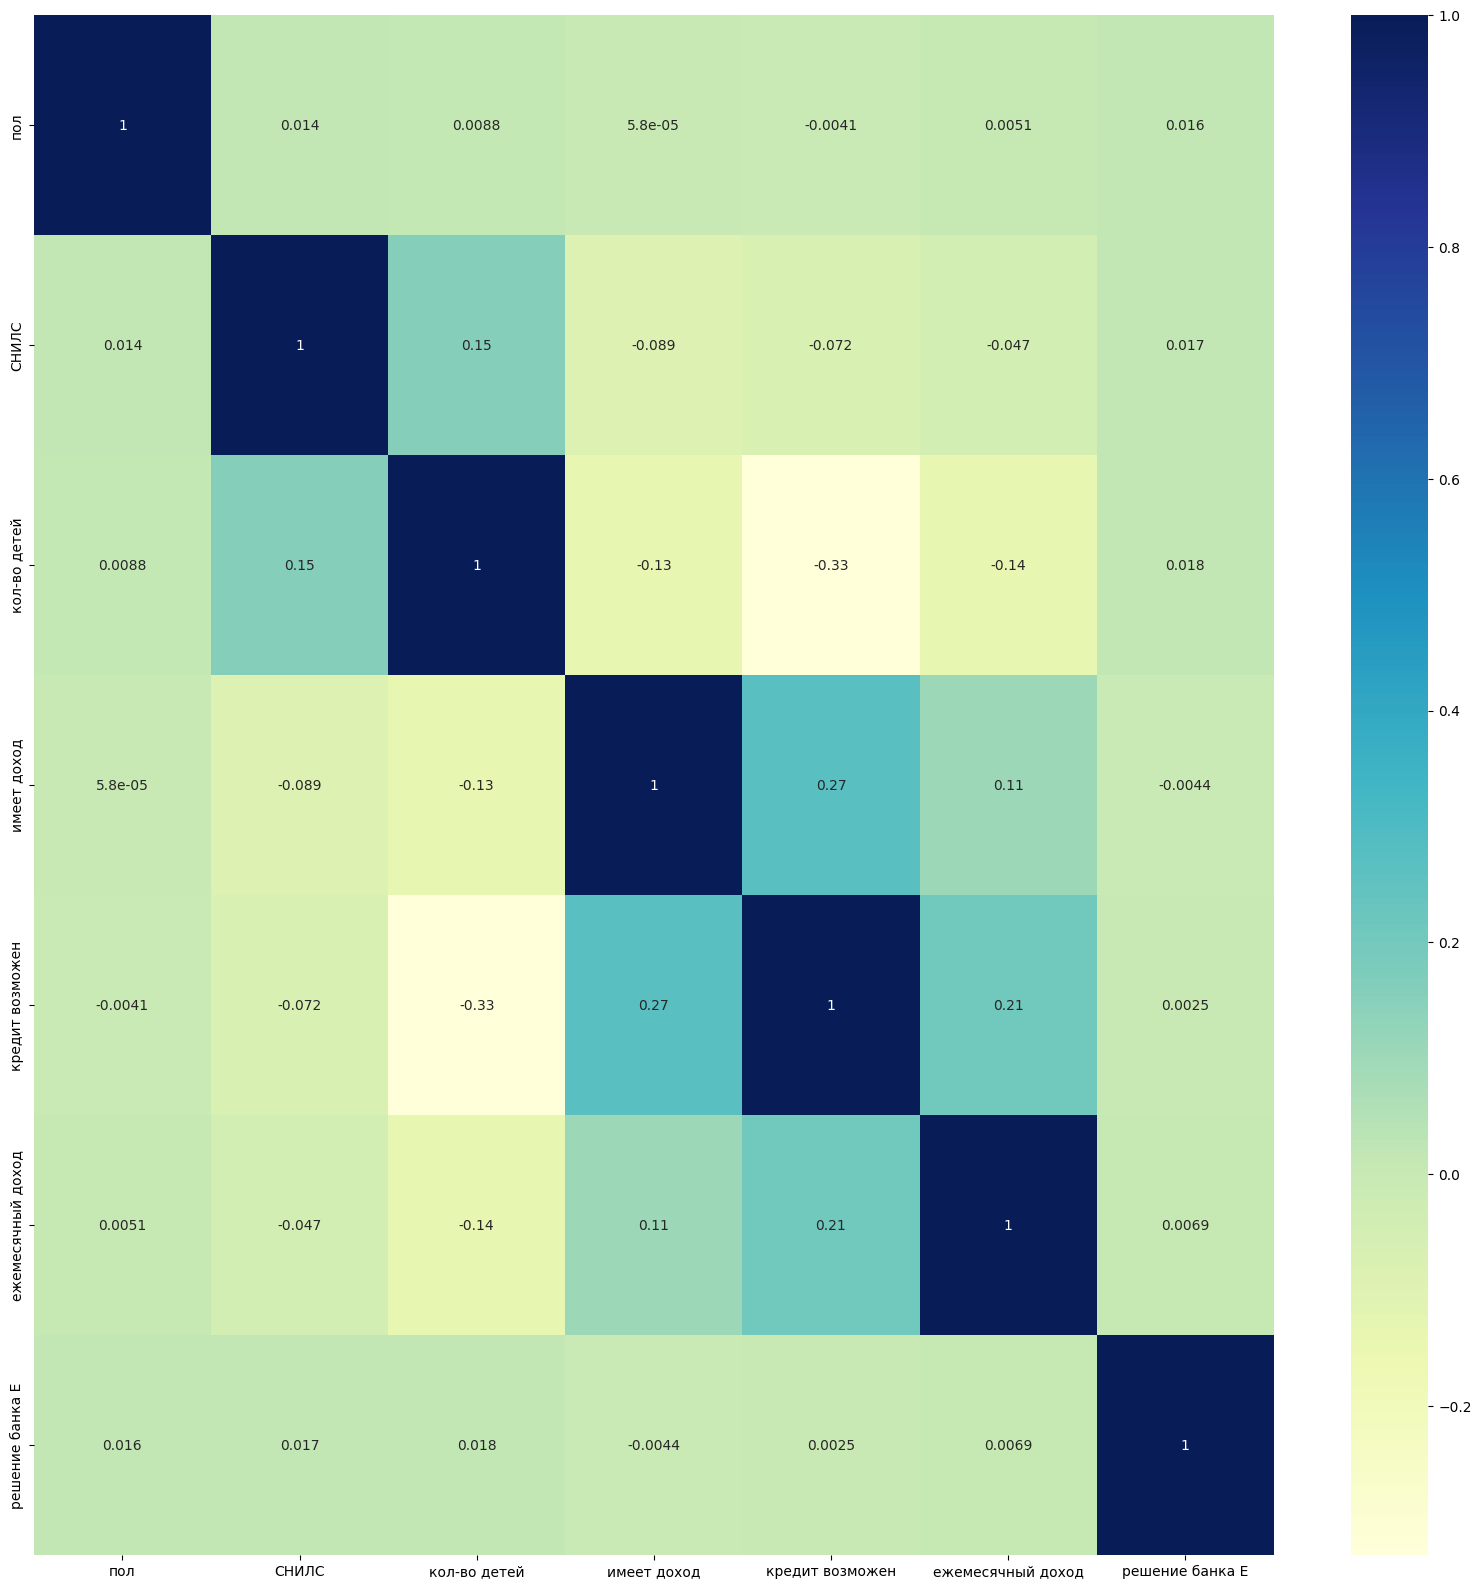

In [39]:
df5_B_1=df4[['пол', 'СНИЛС', 'кол-во детей', 'имеет доход','кредит возможен', 'ежемесячный доход', 'решение банка E']]
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(df5_B_1.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

<Axes: xlabel='кредитная нагрузка', ylabel='решение банка B'>

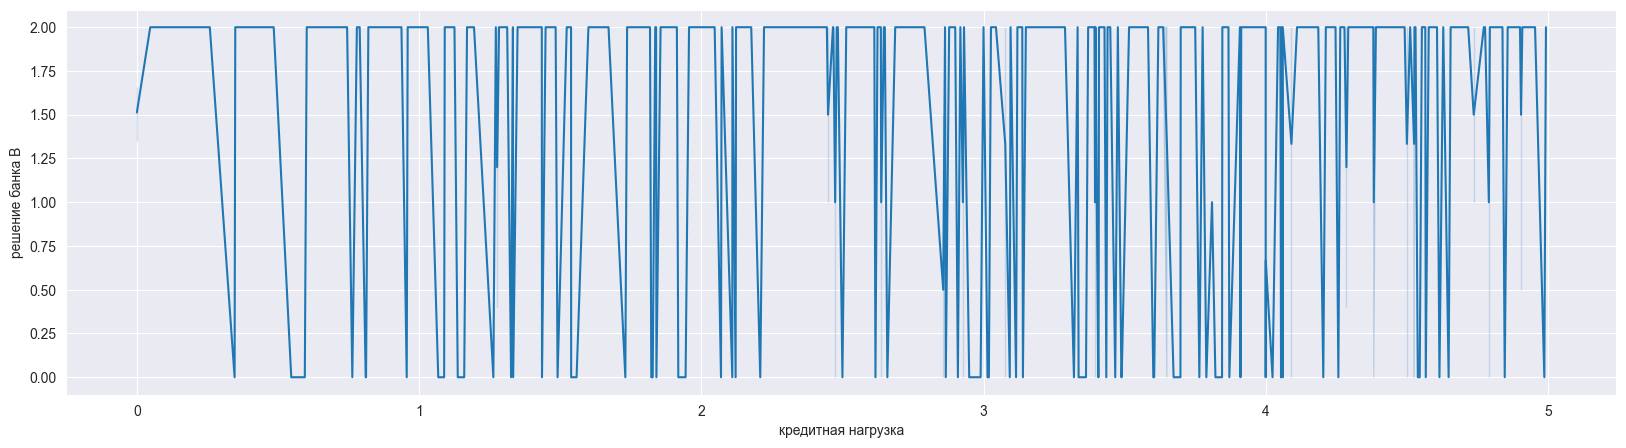

In [42]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df4[df4["кредитная нагрузка"]<5], x="кредитная нагрузка", y="решение банка B")


/tmp/ipykernel_1674864/744315241.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,


[Text(0, 0, '0'), Text(1, 0, '1')]

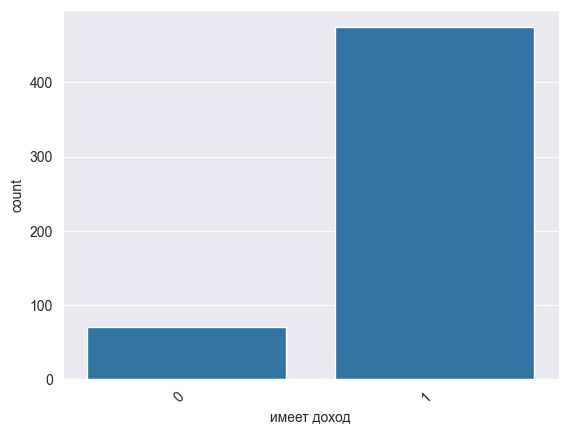

In [49]:
plt.figure()
myplot=sns.countplot(df4[df4["кредитная нагрузка"]<5], x= 'имеет доход')
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45,
                    horizontalalignment='right')

In [44]:
dfn=df4[df4["кредитная нагрузка"]<5]


In [59]:
ss=df4.groupby( 'категория товара')["решение банка A"].value_counts()

In [ ]:
df5_B_1=df4[['пол', 'СНИЛС', 'кол-во детей', 'имеет доход','кредит возможен', 'ежемесячный доход', 'решение банка B']]
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(df5_B_1.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

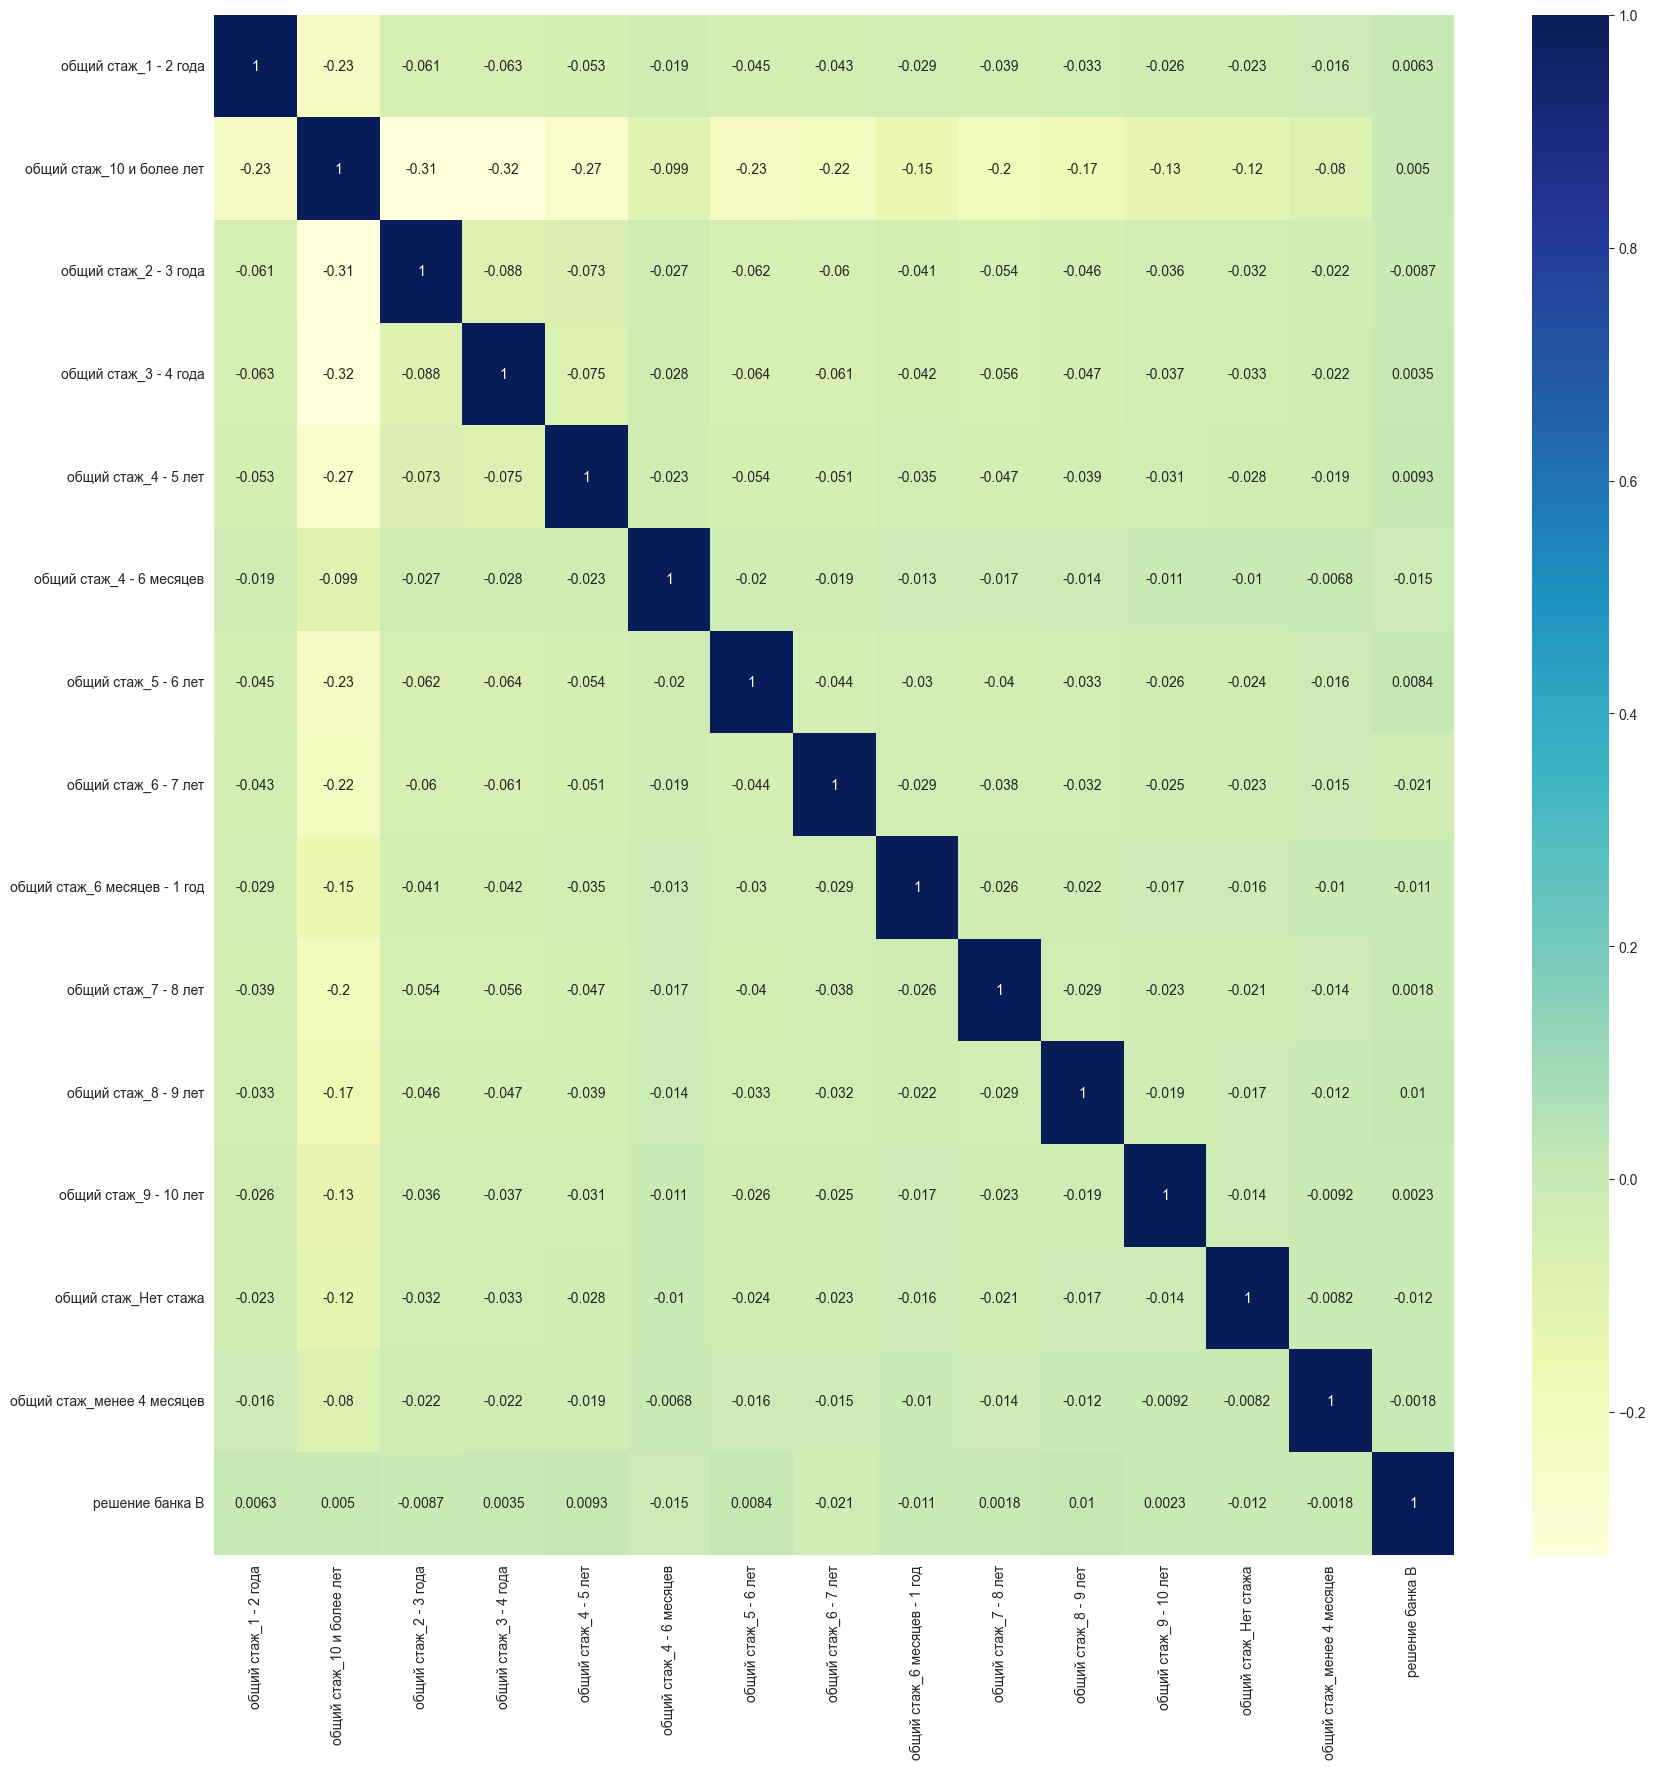

In [68]:
cols = [col for col in df4.columns if 'стаж_' in col]
        
df5_B=df4[cols +['решение банка B']]
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(df5_B.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

In [66]:
cols = [col for col in df4.columns if 'стаж_' in col]
cols=cols + ['решение банка B']
cols

['общий стаж_1 - 2 года',
 'общий стаж_10 и более лет',
 'общий стаж_2 - 3 года',
 'общий стаж_3 - 4 года',
 'общий стаж_4 - 5 лет',
 'общий стаж_4 - 6 месяцев',
 'общий стаж_5 - 6 лет',
 'общий стаж_6 - 7 лет',
 'общий стаж_6 месяцев - 1 год',
 'общий стаж_7 - 8 лет',
 'общий стаж_8 - 9 лет',
 'общий стаж_9 - 10 лет',
 'общий стаж_Нет стажа',
 'общий стаж_менее 4 месяцев',
 'решение банка B']